# Curve Fitting

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read the Dataset

In [2]:
df = pd.read_csv('D:/Datasets/COVID19_line_list_data.csv')
df.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 25              1085
Unnamed: 26              1085
dtype: int64

### I am interested in only 'country' and 'reporting date' columns. They have no null values so no need of filling NaN, lets go ahead

In [4]:
df.shape

(1085, 27)

In [5]:
df['country'].value_counts()

China          197
Japan          190
South Korea    114
Hong Kong       94
Singapore       93
Germany         54
Thailand        41
France          39
Spain           34
Taiwan          34
Malaysia        23
UAE             21
UK              20
USA             18
Iran            18
Bahrain         17
Vietnam         16
Australia       15
Canada          12
Kuwait           9
Phillipines      3
Italy            3
India            3
Austria          2
Russia           2
Sri Lanka        1
Belgium          1
Cambodia         1
Israel           1
Afghanistan      1
Egypt            1
Croatia          1
Nepal            1
Switzerland      1
Sweden           1
Lebanon          1
Algeria          1
Finland          1
Name: country, dtype: int64

### Lets first analyze 'China'

In [6]:
china = df[df['country'].values=='China']['reporting date']
china = pd.to_datetime(china)
Japan = df[df['country'].values=='Japan']['reporting date']
Japan = pd.to_datetime(Japan)
Korea = df[df['country'].values=='South Korea']['reporting date']
Korea = pd.to_datetime(Korea)
Hongkong = df[df['country'].values=='Hong Kong']['reporting date']
Hongkong = pd.to_datetime(Hongkong)
Singapore = df[df['country'].values=='Singapore']['reporting date']
Singapore = pd.to_datetime(Singapore)

In [7]:
china.value_counts()

2020-01-22    56
2020-01-25    39
2020-01-24    28
2020-01-23    22
2020-01-27    19
2020-01-21    16
2020-01-26    15
2020-01-20     2
Name: reporting date, dtype: int64

In [8]:
Japan.value_counts()

2020-02-27    23
2020-02-22    22
2020-02-26    20
2020-02-23    14
2020-02-21    12
2020-02-24    12
2020-02-19    11
2020-02-20     9
2020-02-25     8
2020-02-14     7
2020-02-18     6
2020-02-15     6
2020-02-17     6
2020-02-16     4
2020-01-30     4
2020-02-13     4
2020-01-28     3
2020-02-05     3
2020-02-01     3
2020-02-04     3
2020-02-10     2
2020-01-26     1
2020-01-29     1
2020-01-15     1
2020-01-24     1
2020-02-08     1
2020-01-25     1
2020-01-31     1
Name: reporting date, dtype: int64

In [9]:
Korea.value_counts()

2020-02-20    55
2020-02-19    20
2020-02-06     4
2020-01-31     4
2020-01-30     3
2020-02-09     3
2020-02-02     3
2020-02-05     3
2020-02-22     3
2020-02-23     2
2020-01-20     1
2020-02-18     1
2020-02-25     1
2020-01-25     1
2020-02-01     1
2020-02-17     1
2020-01-27     1
2020-02-04     1
2020-01-24     1
2020-02-07     1
2020-02-26     1
2020-02-21     1
2020-02-16     1
2020-02-11     1
Name: reporting date, dtype: int64

In [10]:
Hongkong.value_counts()

2020-02-09    10
2020-02-11     7
2020-02-24     7
2020-02-10     6
2020-02-26     6
2020-02-19     4
2020-02-25     4
2020-02-20     4
2020-02-23     4
2020-02-17     3
2020-02-06     3
2020-01-24     3
2020-02-05     3
2020-02-04     3
2020-02-14     3
2020-01-27     3
2020-02-13     3
2020-02-07     2
2020-01-29     2
2020-01-22     2
2020-01-30     2
2020-02-27     2
2020-02-02     2
2020-02-18     2
2020-01-31     1
2020-02-16     1
2020-02-12     1
2020-02-22     1
Name: reporting date, dtype: int64

In [11]:
Singapore.value_counts()

2020-02-14    9
2020-02-13    8
2020-02-08    7
2020-02-04    6
2020-02-15    5
2020-02-19    4
2020-02-18    4
2020-02-05    4
2020-02-07    3
2020-02-16    3
2020-01-30    3
2020-02-09    3
2020-01-29    3
2020-02-22    3
2020-01-24    3
2020-02-12    3
2020-01-31    3
2020-02-17    2
2020-02-10    2
2020-02-26    2
2020-02-01    2
2020-02-06    2
2020-01-28    2
2020-02-11    2
2020-02-24    1
2020-01-26    1
2020-01-27    1
2020-02-21    1
2020-02-25    1
Name: reporting date, dtype: int64

In [12]:
chinadf = pd.DataFrame({'Cases':china.value_counts().values}, index=china.value_counts().index)
japandf = pd.DataFrame({'Cases':Japan.value_counts().values}, index=Japan.value_counts().index)
koreadf = pd.DataFrame({'Cases':Korea.value_counts().values}, index=Korea.value_counts().index)
hongkongdf = pd.DataFrame({'Cases':Hongkong.value_counts().values}, index=Hongkong.value_counts().index)
singaporedf = pd.DataFrame({'Cases':Singapore.value_counts().values}, index=Singapore.value_counts().index)

### Lets sort on the basis of reporting date

In [13]:
chinadf.sort_index(axis=0, inplace=True)
japandf.sort_index(axis=0, inplace=True)
koreadf.sort_index(axis=0, inplace=True)
hongkongdf.sort_index(axis=0, inplace=True)
singaporedf.sort_index(axis=0, inplace=True)

### Lets find the cumulative cases

In [14]:
chinadf['CumulativeCases'] = chinadf['Cases'].cumsum()
japandf['CumulativeCases'] = japandf['Cases'].cumsum()
koreadf['CumulativeCases'] = koreadf['Cases'].cumsum()
hongkongdf['CumulativeCases'] = hongkongdf['Cases'].cumsum()
singaporedf['CumulativeCases'] = singaporedf['Cases'].cumsum()

In [15]:
chinadf

,Cases,CumulativeCases
2020-01-20,2,2
2020-01-21,16,18
2020-01-22,56,74
2020-01-23,22,96
2020-01-24,28,124
2020-01-25,39,163
2020-01-26,15,178
2020-01-27,19,197


In [16]:
japandf

,Cases,CumulativeCases
2020-01-15,1,1
2020-01-24,1,2
2020-01-25,1,3
2020-01-26,1,4
2020-01-28,3,7
2020-01-29,1,8
2020-01-30,4,12
2020-01-31,1,13
2020-02-01,3,16
2020-02-04,3,19


In [17]:
koreadf

,Cases,CumulativeCases
2020-01-20,1,1
2020-01-24,1,2
2020-01-25,1,3
2020-01-27,1,4
2020-01-30,3,7
2020-01-31,4,11
2020-02-01,1,12
2020-02-02,3,15
2020-02-04,1,16
2020-02-05,3,19


In [18]:
hongkongdf

,Cases,CumulativeCases
2020-01-22,2,2
2020-01-24,3,5
2020-01-27,3,8
2020-01-29,2,10
2020-01-30,2,12
2020-01-31,1,13
2020-02-02,2,15
2020-02-04,3,18
2020-02-05,3,21
2020-02-06,3,24


In [19]:
singaporedf

,Cases,CumulativeCases
2020-01-24,3,3
2020-01-26,1,4
2020-01-27,1,5
2020-01-28,2,7
2020-01-29,3,10
2020-01-30,3,13
2020-01-31,3,16
2020-02-01,2,18
2020-02-04,6,24
2020-02-05,4,28


### Lets plot the graph

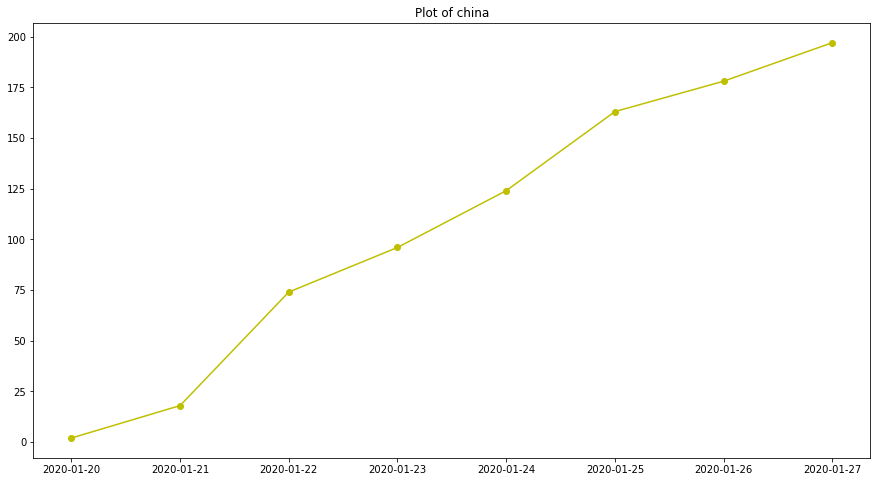

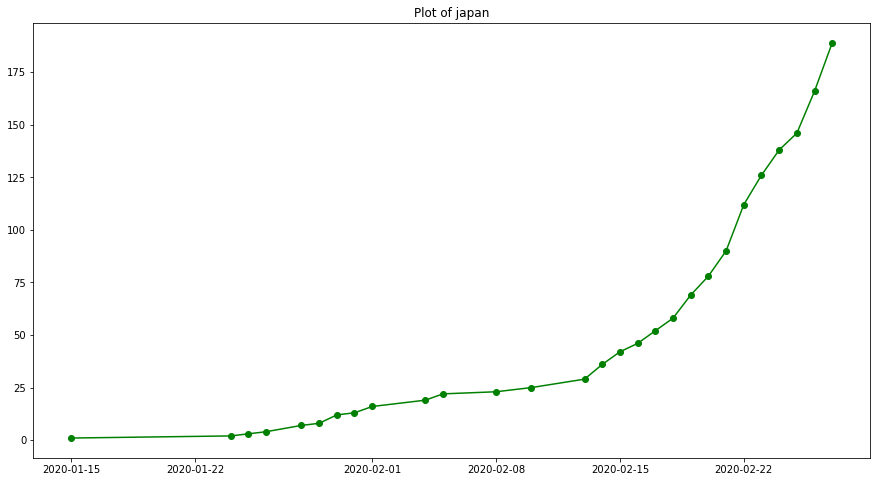

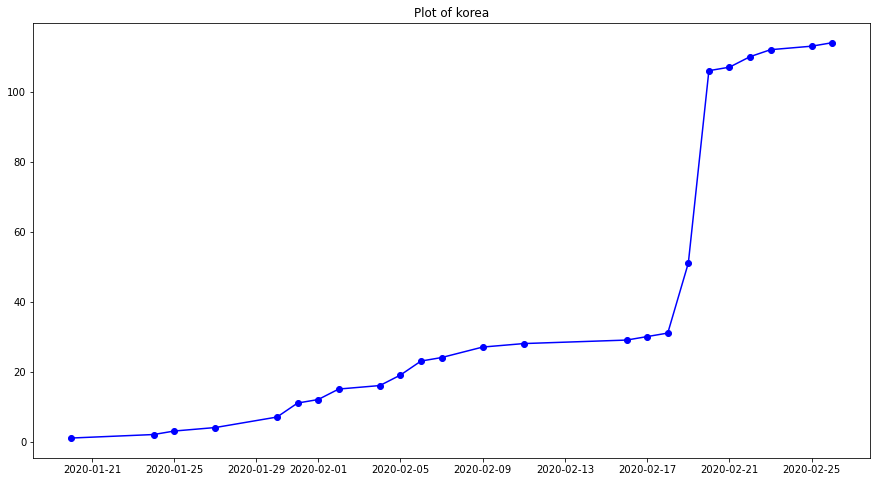

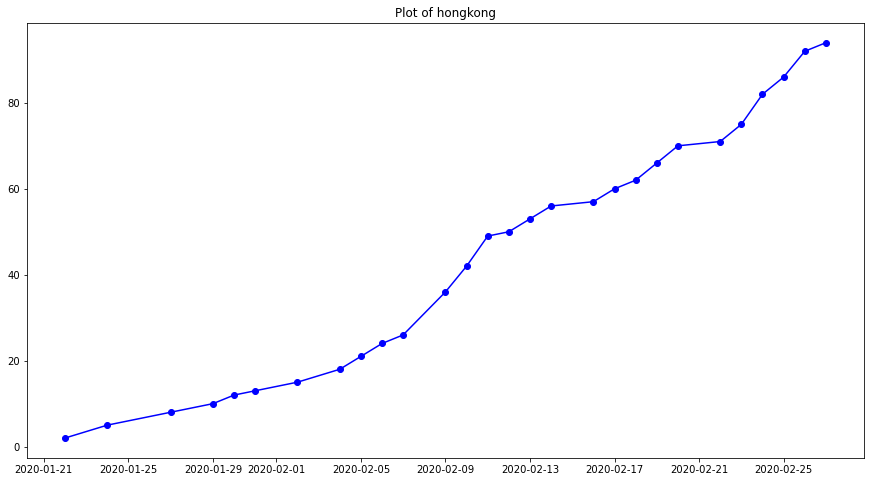

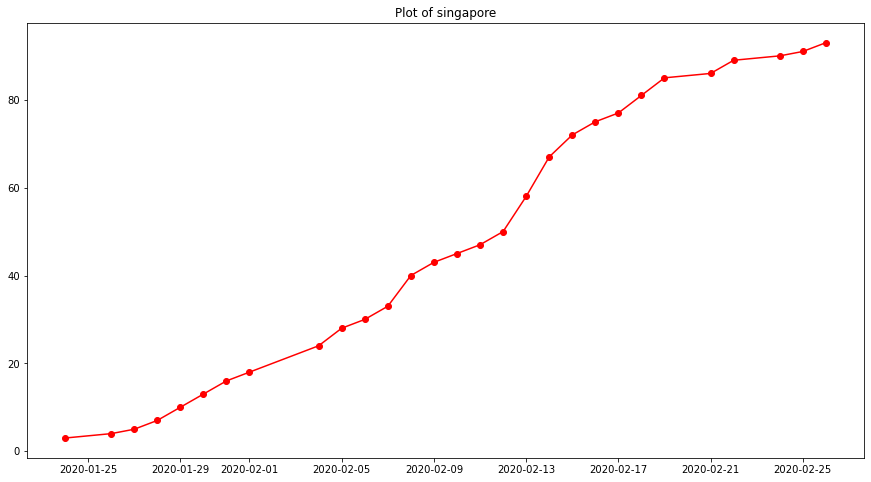

In [20]:
lst = [chinadf, japandf, koreadf, hongkongdf, singaporedf]
names = ['china', 'japan', 'korea', 'hongkong', 'singapore']
clr = ['r', 'g', 'b', 'c', 'm', 'y']
for items,country in zip(lst,names):
    plt.figure(figsize=(15, 8))
    plt.plot(items.index, items['CumulativeCases'], color=np.random.choice(clr), marker='o')
    plt.title('Plot of '+country)
    plt.show

### Now lets find the best fitting line

In [21]:
def lineEqn(x,c,m):
    return c+m*x

In [22]:
from scipy.optimize import curve_fit

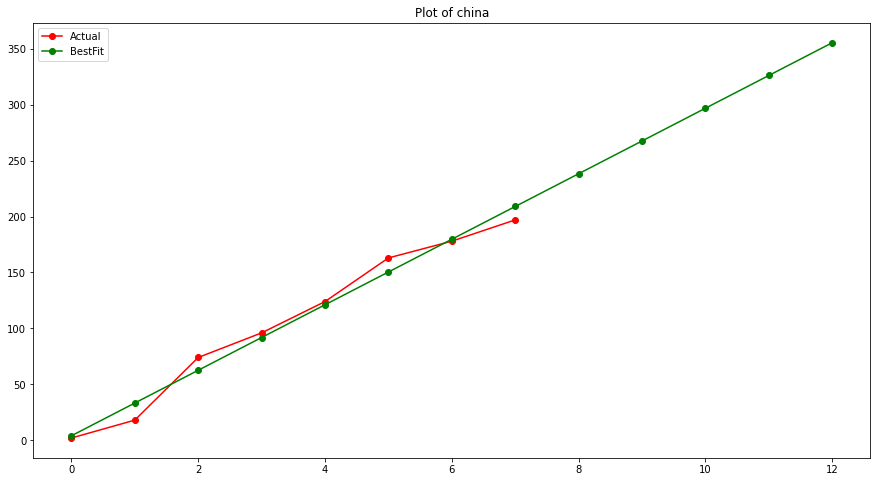

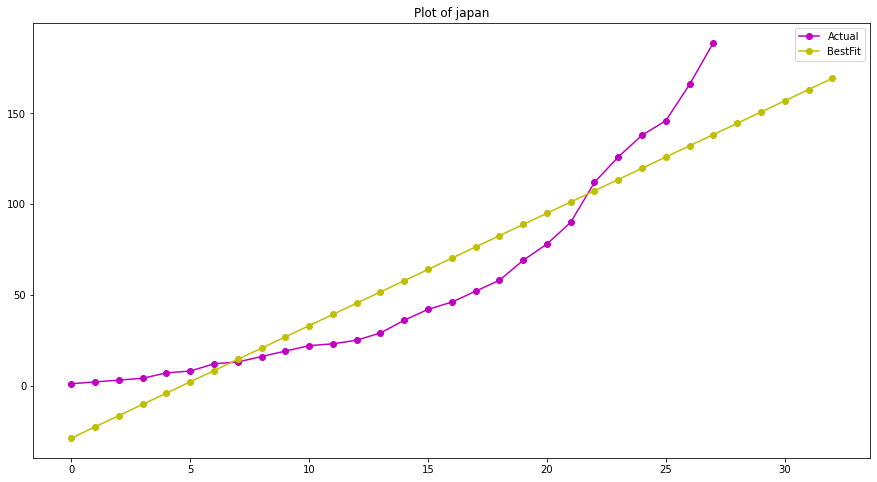

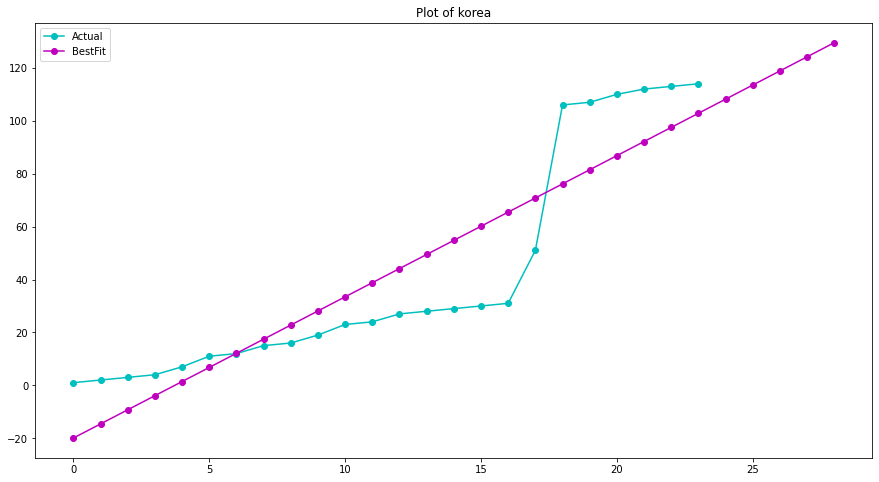

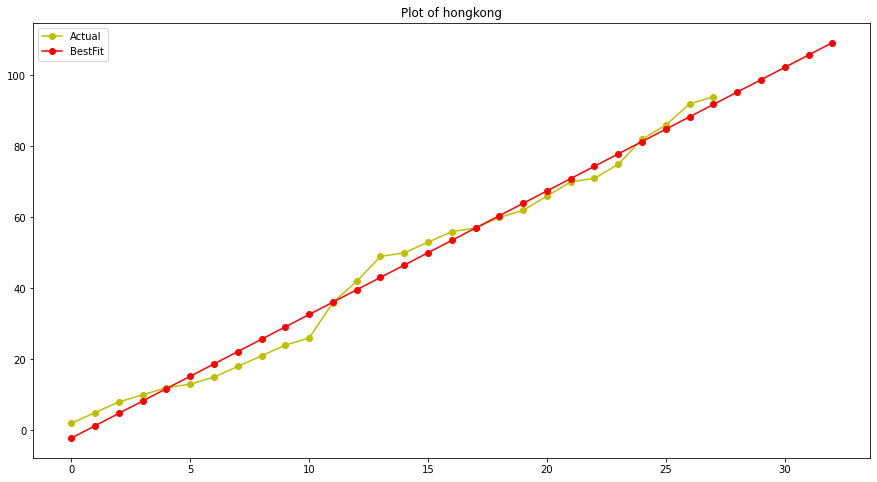

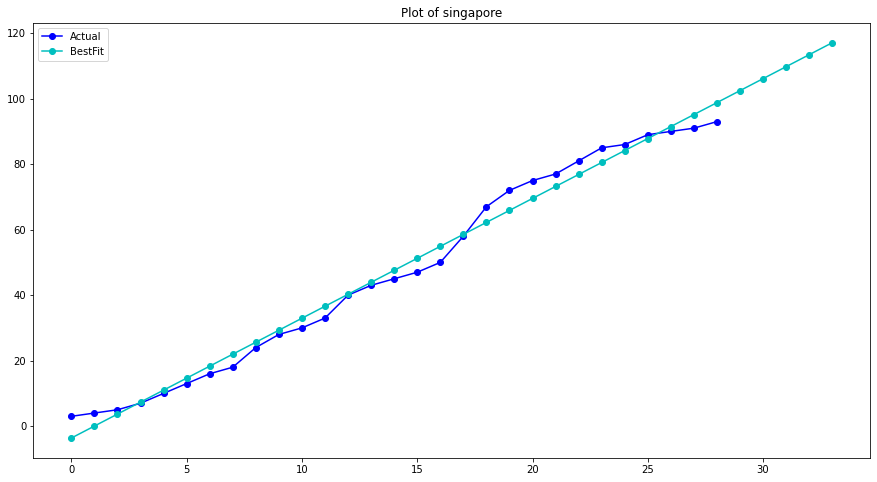

In [24]:
for items,country in zip(lst, names):
    yopt, ycov = curve_fit(lineEqn, range(len(items)), items['CumulativeCases'], p0=[1,2])
    ypred = lineEqn(range(len(items)+5), yopt[0], yopt[1])
    rand = np.random.randint(6)
    plt.figure(figsize=(15,8))
    plt.plot(range(len(items)), items['CumulativeCases'], color=clr[rand], marker='o', label='Actual')
    plt.plot(range(len(items)+5), ypred, color=clr[(rand+1)%6], marker='o', label='BestFit')
    plt.title('Plot of '+country)
    plt.legend()
    plt.show()